## Timothy Miller
## GTECH 73100, Dr. Sun

# [Assignment Six](https://github.com/TangoYankee/gtech_731-geocomp-hw/tree/main/assignment-six)

## Task 1
Install `geopandas` and other required packages

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt

## Task 2
- Find three sets of spatial data
- Import the data into GeoDataFrame using geopandas
- Take one dataset and show the specific types of:
  - the entire dataframe
  - the geometry column
  - individual geometry object
- Export all three GeoDataFrames into a single geopackage

Read the data files, automatically coerced into GeoDataFrame

In [7]:
bus_routes_express = gpd.read_file(
    "data/express_bus_routes_nyc_nov2020/express_bus_routes_nyc_nov2020.shp"
)
bus_stops_express = gpd.read_file(
    "data/express_bus_stops_nyc_nov2020/express_bus_stops_nyc_nov2020.shp"
)

ages = gpd.read_file("data/boi_select_ages_tract_borders.geojson")

### Show the types of the express bus routes data

_whole data_

In [9]:
bus_stops_express.head()

,stop_id,stop_name,stop_lat,stop_lon,GEOID,NAMELSAD,geometry
0,200008,RICHMOND TER/SOUTH AV,40.640108,-74.165755,36085,Richmond County,POINT (938248.054 172528.505)
1,200097,MIDLAND AV/KISWICK ST,40.574051,-74.096488,36085,Richmond County,POINT (957445.189 148433.469)
2,200102,FR CAPODANNO BL/HUNTER AV,40.572924,-74.087670,36085,Richmond County,POINT (959894.458 148020.300)
3,200104,FR CAPODANNO BL/SIOUX ST,40.575144,-74.083856,36085,Richmond County,POINT (960954.797 148828.064)
4,200115,FR CAPODANNO BL/SAND LA,40.590397,-74.066399,36085,Richmond County,POINT (965808.564 154380.952)


In [5]:
type(bus_stops_express.head())

geopandas.geodataframe.GeoDataFrame

In [28]:
for field in bus_stops_express:
    print(type(bus_stops_express[field][0]))

<class 'numpy.int64'>
<class 'str'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'str'>
<class 'str'>
<class 'shapely.geometry.point.Point'>


In [ ]:
bus_routes_express.dtypes

route_id        object
route_dir       object
route_shor      object
route_long      object
color           object
geometry      geometry
dtype: object

_geometry field_

In [ ]:
type(bus_stops_express)

geopandas.geodataframe.GeoDataFrame

In [ ]:
bus_stops_express.geometry.dtypes

_individual geometry object_

In [ ]:
type(bus_stops_express.geometry[0])

shapely.geometry.point.Point

### Export to single geopackage

In [ ]:
bus_routes_express.to_file(
    "data/package.gpkg", layer="bus_routes_express", driver="GPKG"
)
bus_stops_express.to_file("data/package.gpkg", layer="bus_stops_express", driver="GPKG")
ages.to_file("data/package.gpkg", layer="ages", driver="GPKG")

## Task 3
- Use basic web mapping methods in geopandas to visualize the data.  
(The plot has bus data for all five boroughs but it excludes the age data for Staten Island. 
This is because I am actively working with this data and it's in awkward stage.)

<Axes: >

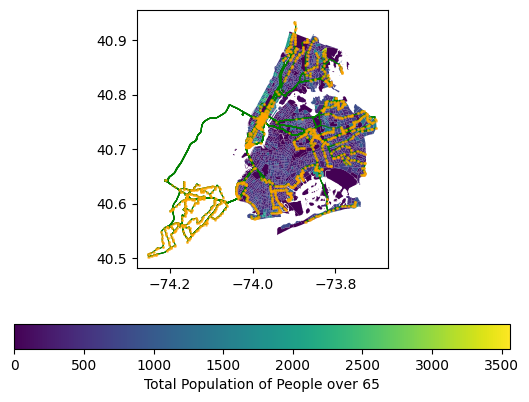

In [ ]:
common_crs = 4326
fig, ax = plt.subplots()
ax.set_aspect("equal")
ages.plot(
    ax=ax,
    column="tot_pop_over_65_est",
    zorder=0,
    legend=True,
    legend_kwds={
        "label": "Total Population of People over 65",
        "orientation": "horizontal",
    },
)
bus_routes_express.to_crs(common_crs).plot(
    ax=ax, color="green", linewidth=0.75, zorder=1
)
bus_stops_express.to_crs(common_crs).plot(
    ax=ax, color="orange", marker="o", markersize=1, alpha=0.5, zorder=2
)